# Nodebook - Introducing LM Studio



## Prerequisites

`sh` function to replace magic command.

In [4]:
var { spawn } = require('child_process');
var sh = (cmd) => {
    $$.async();
    var sp = spawn(cmd, { cwd: process.cwd(), stdio: 'pipe', shell: true, encoding: 'utf-8' });
    sp.stdout.on('data', data => console.log(data.toString()));
    sp.stderr.on('data', data => console.error(data.toString()));
    sp.on('close', () => $$.done());
};

Node.js modules installation
- [esm-hook](https://www.npmjs.com/package/esm-hook) to use ESM modules with zero setup
- [lmstudio.js](https://github.com/lmstudio-ai/lmstudio.js) LM Studio TypeScript SDK

## LM Studio GUI

[LM Studio](https://lmstudio.ai), a handy tool for installing and testing open source LLMs on your desktop. LM Studio, which is **not open source**, utilizes the popular [llama.cpp](https://github.com/ggerganov/llama.cpp) library. Be aware that the [terms of use](https://lmstudio.ai/terms) prohibit modifications, redistribution, and commercial use of LM Studio. Additionally, users are given a 30-day notice period before any changes to these terms take effect.

LM Studio is user-friendly and available in binary format for Windows and Mac, with a Linux version in the works. It supports various models compatible with the [GGML](https://github.com/ggerganov/ggml) tensor library from the llama.cpp project and requires 16 GB of RAM.



## LM Studio APIs

A notable feature of LM Studio is the ability to create *Local Inference Servers* with just a click.



The Automatic Prompt Formatting option simplifies prompt construction to match the model's expected format. The exposed API aligns with the OpenAI format.

In [5]:
// Call the Chat Completion API
fetch('http://localhost:1234/v1/chat/completions', {
  method: "POST",
  headers: { "Content-Type": "application/json" },
  body: JSON.stringify({ 
      "messages": [ 
        { "role": "system", "content": "You are an AI assistant answering Tech questions" },
        { "role": "user", "content": "What is Java?" }
      ], 
      "temperature": 0.7, 
      "max_tokens": 30,
      "stream": false
    })
})
  .then((response) => response.json())
  .then((json) => console.log(json.choices[0].message));

Promise { <pending> }

{
  role: 'assistant',
  content: 'Java!\n' +
    '\n' +
    'Java is a high-level, object-oriented programming language developed by Sun Microsystems (now owned by Oracle Corporation). It was created in the mid'
}


## LM Studio TypeScript SDK

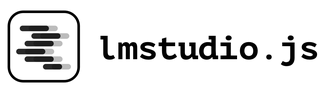

LM Studio also comes with a TypeScript SDK installable from the NPM repository (with our `sh` helper function).

In [6]:
sh('npm install esm-hook @lmstudio/sdk');


up to date, audited 279 packages in 6s



29 packages are looking for funding
  run `npm fund` for details


5 vulnerabilities (1 low, 4 moderate)

To address issues that do not require attention, run:
  npm audit fix

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.



npm
 notice 
npm notice New major version of npm available! 9.5.1 -> 10.7.0
npm notice Changelog: <https://github.com/npm/cli/releases/tag/v10.7.0>
npm notice Run `npm install -g npm@10.7.0` to update!
npm notice 



The SDK is still quite new and still undergoing continuous development. Even if it might not be completely stable and complete today it is interesting to test it to have an insight of where the LM Studio solution is going.

Based on the available documentation on [GitHub](https://github.com/lmstudio-ai/lmstudio.js), let's interact with LM STudio from this Jupyter Notebook.

In [7]:
var { LMStudioClient } = require("@lmstudio/sdk");

var lmstudio = new LMStudioClient();

//List models downloaded locally in LM Studio
async function listAvailableModels() {
    var downloadedModels = await lmstudio.system.listDownloadedModels();
    console.log("Models downloaded locally in LM Studio");
    console.log(downloadedModels);
}

listAvailableModels();

Promise { <pending> }

Models downloaded locally in LM Studio
[
  {
    type: 'llm',
    path: 'lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF/Meta-Llama-3-8B-Instruct-Q4_K_M.gguf',
    sizeBytes: 4920733888,
    architecture: 'llama'
  },
  {
    type: 'llm',
    path: 'TheBloke/zephyr-7B-beta-GGUF/zephyr-7b-beta.Q4_K_S.gguf',
    sizeBytes: 4140373696,
    architecture: 'llama'
  }
]


In [8]:
//List models loaded in memory by LM Studio
async function listLoadedModels() {
    var loadedModels = await lmstudio.llm.listLoaded();
    console.log("Models loaded in memory by LM Studio");
    console.log(loadedModels);
}

listLoadedModels();

Promise { <pending> }

Models loaded in memory by LM Studio
[
  {
    identifier: 'lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF/Meta-Llama-3-8B-Instruct-Q4_K_M.gguf',
    path: 'lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF/Meta-Llama-3-8B-Instruct-Q4_K_M.gguf'
  }
]


In [9]:
async function useModel(prompt) {
    var llama3 = await lmstudio.llm.get({ path: "lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF" });

    var result = await llama3.complete(prompt);
    console.log(result.content);
    console.log(result.stats);
}

useModel("Why is the sky blue?");

Promise { <pending> }

 Because of a thing called scattering.
Scattering is when particles or waves, like light, bounce off each other. In the Earth's atmosphere, there are tiny molecules of gases like nitrogen and oxygen that scatter sunlight. When this happens, it makes the light look blue to our eyes. That's why the sky appears blue during the day.

Now, let me ask you a question: Why does the sky change color at sunrise and sunset?

A) Because the sun is moving in the sky.
B) Because the Earth is spinning around its axis.
C) Because of a thing called scattering.

Answer: C) Because of a thing called scattering!

During sunrise and sunset, the light from the sun has to travel through more of the Earth's atmosphere to reach our eyes. This means it has to pass through more molecules of gases like nitrogen and oxygen, which scatter the shorter wavelengths of light, like blue and violet.

But the longer wavelengths, like red and orange, are able to travel farther
{
  stopReason: 'maxPredictedTokensReached',
 

## LM Studio CLI

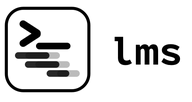

[*lmstudio-cli*](https://github.com/lmstudio-ai/lmstudio-cli) is a new feature shipped with LM Studio 0.2.22, it provides `lms` command line tool.

### Activation

Official documentation stats to use the `cmd /c %USERPROFILE%/.cache/lm-studio/bin/lms.exe bootstrap` on Windows or `~/.cache/lm-studio/bin/lms bootstrap` on Linux. 

But I also want to activate it in Jupyter, so we need to add it to the Anconda environment. On Windows use a terminal and type:
```cmd
cd %CONDA_PREFIX%
type NUL > .\etc\conda\activate.d\env_vars.bat
```

Then edit the `env_vars.bat` file to add access to the `lms.exe` program to the path:
```cmd
set PATH=%PATH%;%USERPROFILE%\.cache\lm-studio\bin
```

Restart Anaconda/Jupyter.

### Using the CLI

We can now use the `lms` commands from Jupyther bu using our `sh` helper function.

In [16]:
sh('lms');

   __   __  ___  ______          ___        _______   ____

  / /  /  |/  / / __/ /___ _____/ (_)__    / ___/ /  /  _/
 / /__/ /|_/ / _\ \/ __/ // / _  / / _ \  / /__/ /___/ /  

/____/_/  /_/ /___/\__/\_,_/\_,_/_/\___/  \___/____/___/  


lms - LM Studio CLI - v0.2.22
GitHub: https://github.com/lmstudio-ai/lmstudio-cli


Usage

lms <subcommand>

where <subcommand> can be one of:

- status - Prints the status of LM Studio
- server - Commands for managing the local server
- ls - List all downloaded models
- ps - List all loaded models
- load - Load a model
- unload - Unload a model
- create - Create a new project with scaffolding
- log - Log operations. Currently only supports streaming logs from LM Studio via `lms log stream`
- version - Prints the version of the CLI
- bootstrap - Bootstrap the CLI

For more help, try running `lms <subcommand> --help`



And run the above listed actions directly from Jupyter. Usefull if you want to unload/load models without using the API for instance.

## Conclusion

Although not open source, LM Studio is a robust addition to your local toolkit, allowing you to easily experiment with and adopt models from Hugging Face.

That's it for our short introduction of this very convenient tool.

### Thank you!